In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import numpy as np
from tqdm import tqdm
plt.rcParams['text.usetex'] = True

In [54]:
df = pd.read_csv('barrier_variance.csv')
print(df.shape)
df.head(20)

(324, 7)


,dH sigma,dS sigma,effective barrier,permeability,max barrier,max enthalpic barrier,max entropic barrier
0,0.0001,3.333333e-07,5.971662,4.989413e+03,10.500709,4.500456,-0.019998
1,0.0001,3.333333e-06,5.971665,4.989387e+03,10.504404,4.500498,-0.019985
2,0.0001,3.333333e-05,5.971738,4.988768e+03,10.545573,4.500427,-0.019836
3,0.0001,1.666667e-04,5.973708,4.972307e+03,10.723824,4.500440,-0.019197
4,0.0001,3.333333e-04,5.979954,4.920448e+03,10.989482,4.500535,-0.018528
5,0.0001,1.666667e-03,6.179096,3.522375e+03,12.689472,4.500471,-0.012403
6,0.0001,3.333333e-03,6.773809,1.298096e+03,15.189983,4.500434,-0.004691
7,0.0001,5.000000e-03,7.663179,2.917301e+02,17.080044,4.500471,0.000729
8,0.0001,6.666667e-03,8.655108,5.519420e+01,20.394287,4.500479,0.014109
9,0.0001,8.333333e-03,9.732515,9.046782e+00,22.054629,4.500486,0.018002


In [55]:
dS_sigs = np.sort([a for a in df['dS sigma'].value_counts().index])
dH_sigs = np.sort([a for a in df['dH sigma'].value_counts().index])
print(dS_sigs)
print(dH_sigs)

[3.33333333e-07 3.33333333e-06 3.33333333e-05 1.66666667e-04
 3.33333333e-04 1.66666667e-03 3.33333333e-03 5.00000000e-03
 6.66666667e-03 8.33333333e-03 1.00000000e-02 1.33333333e-02
 1.66666667e-02 2.00000000e-02 2.33333333e-02 2.66666667e-02
 3.00000000e-02 3.33333333e-02]
[1.0e-04 1.0e-03 1.0e-02 5.0e-02 1.0e-01 5.0e-01 1.0e+00 1.5e+00 2.0e+00
 2.5e+00 3.0e+00 4.0e+00 5.0e+00 6.0e+00 7.0e+00 8.0e+00 9.0e+00 1.0e+01]


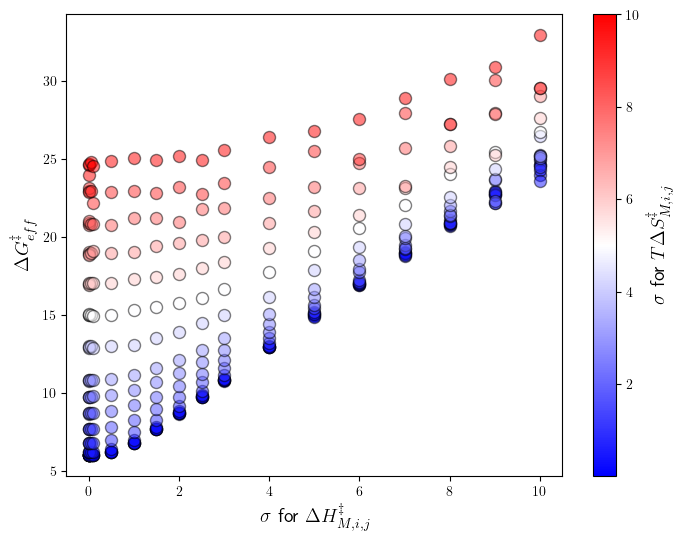

In [56]:
cmap = mpl.cm.bwr

fig, ax = plt.subplots(1,1, figsize=(8,6))

for i,s in enumerate(dS_sigs):
    df1 = df[df['dS sigma'] == s]
    s_scaled = (s - dS_sigs.min()) / (dS_sigs.max() - dS_sigs.min())
    ax.scatter(df1['dH sigma'], df1['effective barrier'], s=75, edgecolor='k', 
               label=f'{s*300:.4g}', color=cmap(s_scaled), alpha=0.5)

cb = fig.colorbar(plt.cm.ScalarMappable(norm=mcolors.Normalize(300*dS_sigs.min(),300*dS_sigs.max()), cmap=cmap), ax=ax)
cb.set_label(label='$\sigma$ for $T \Delta S_{M,i,j}^{\ddag}$', fontsize=14)
ax.set_xlabel('$\sigma$ for $\Delta H_{M,i,j}^{\ddag}$', fontsize=14)
ax.set_ylabel('$\Delta G_{eff}^{\ddag}$', fontsize=14)
fig.savefig('figs/effective_barrier_vs_sigma_H.png')


# fig, ax = plt.subplots(1,1, figsize=(8,8))

# for i,s in enumerate(dS_sigs[:3]):
#     df1 = df[df['dS sigma'] == s]
#     ax.scatter(df1['dH sigma'], df1['effective barrier'], s=75, edgecolor=None, 
#                label=f'{s*300:.4g}', color=colors[i], alpha=0.5)

# ax.set_xlabel('$\sigma$ for $\Delta H$')
# ax.set_ylabel('$\Delta G_{eff}$')
# ax.legend(title='$\sigma$ for $T\Delta S$');

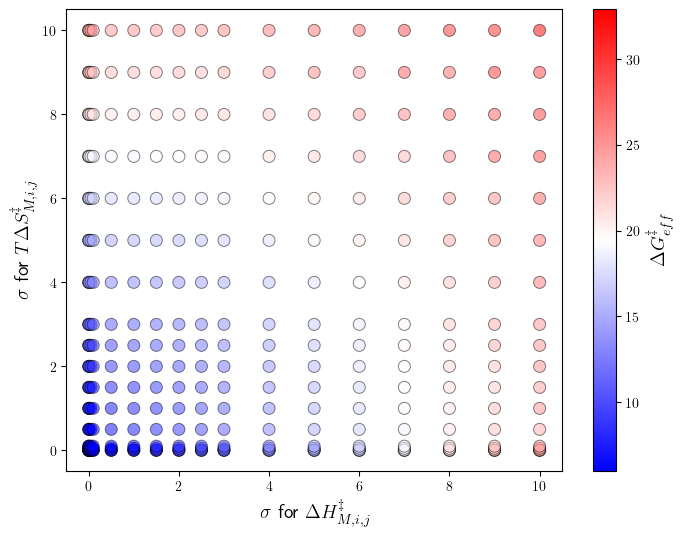

In [57]:
cmap = mpl.cm.bwr

fig, ax = plt.subplots(1,1, figsize=(8,6))

# for i,s in enumerate(dS_sigs):
#     df1 = df[df['dG sigma'] == s]
#     s_scaled = (s - dS_sigs.min()) / (dS_sigs.max() - dS_sigs.min())
#     ax.scatter(df1['dH sigma'], df1['effective barrier'], s=75, edgecolor='k', 
#                label=f'{s*300:.4g}', color=cmap(s_scaled), alpha=0.5)

df1 = df.copy()
df1['dG scaled'] = (df1['effective barrier'] - df1['effective barrier'].min()) / (df1['effective barrier'].max() - df1['effective barrier'].min())
df1['T dS sigma'] = 300*df1['dS sigma']
sns.scatterplot(data=df1, x='dH sigma', y='T dS sigma', hue='dG scaled', palette=cmap, legend=None, s=75, edgecolor='k', alpha=0.5)

cb = fig.colorbar(plt.cm.ScalarMappable(norm=mcolors.Normalize(df1['effective barrier'].min(),df1['effective barrier'].max()), cmap=cmap), ax=ax)
cb.set_label(label='$\Delta G_{eff}^{\ddag}$', fontsize=14)
ax.set_xlabel('$\sigma$ for $\Delta H_{M,i,j}^{\ddag}$', fontsize=14)
ax.set_ylabel('$\sigma$ for $T\Delta S_{M,i,j}^{\ddag}$', fontsize=14)
fig.savefig('figs/sigma_S_vs_sigma_H.png')

In [58]:
# fig, ax = plt.subplots(1,1, figsize=(8,8))

# for i,s in enumerate(dS_sigs):
#     df1 = df[df['dS sigma'] == s]
#     ax.scatter(df1['dH sigma'], df1['max barrier'], s=75, edgecolor=None, 
#                label=f'{300*s:.4g}', color=colors[i], alpha=0.5)

# ax.set_xlabel('$\sigma$ for $\Delta H$')
# ax.set_ylabel('$\Delta G_{max}$')
# ax.legend(title='$\sigma$ for $\Delta S$');

In [59]:
# fig, ax = plt.subplots(1,2, figsize=(16,8))

# s = dS_sigs[0]
# df1 = df[df['dS sigma'] == s]
# ax[0].scatter(df1['max enthalpic barrier'], df1['effective barrier'], s=75, edgecolor=None, label=s, alpha=0.5)

# ax[0].set_xlabel('max $\Delta H$')
# ax[0].set_ylabel('$\Delta G_{eff}$')
# ax[0].legend(title='$\sigma$ for $\Delta S$')

# s = dH_sigs[0]
# df1 = df[df['dH sigma'] == s]
# ax[1].scatter(df1['max entropic barrier'], df1['effective barrier'], s=75, edgecolor=None, label=s, alpha=0.5)

# ax[1].set_xlabel('max $\Delta S$')
# ax[1].set_ylabel('$\Delta G_{eff}$')
# ax[1].legend(title='$\sigma$ for $\Delta H$');

In [60]:
df = pd.read_csv('barrier_variance_ROC.csv')
print(df.shape)
df.head()

(648000, 6)


,paths,permeability,permeability percent,dH sigma,dS sigma,model
0,1,2.494743,0.050001,0.0001,3.333333e-07,1.0
1,2,2.494710,0.050000,0.0001,3.333333e-07,1.0
2,3,2.494711,0.050000,0.0001,3.333333e-07,1.0
3,4,2.494681,0.049999,0.0001,3.333333e-07,1.0
4,5,2.494717,0.050000,0.0001,3.333333e-07,1.0


In [61]:
# fig, ax = plt.subplots(1,2, figsize=(16,8), sharey=True)

# s = dS_sigs[0]
# df1 = df[df['dS sigma'] == s]
# models = np.sort([a for a in df1['model'].value_counts().index])
# ax[0].set_title(f'$\sigma$ for $T\Delta S$ = {300*s:.4g}')

# for m in tqdm(models[::3]):
#     df2 = df1[df1.model == m].sort_values('permeability percent', ascending=False)
#     n_paths = df2.paths.max()

#     df2['flux fraction'] = df2['permeability percent'].cumsum() / 100
#     df2['pore fraction'] = np.arange(1,n_paths+1) / n_paths
#     df2.loc[len(df2.index)] = [0,0,0,0,0,m,0,0] # add zero row for ROC curve

#     sns.lineplot(data=df2, x='pore fraction', y='flux fraction', ax=ax[0], 
#                  label=f"{df2['dH sigma'].mean():.4g}")
    

# ax[0].legend(title='$\sigma$ for $\Delta H$');

# s = dH_sigs[0]
# df1 = df[df['dH sigma'] == s]
# models = np.sort([a for a in df1['model'].value_counts().index])
# ax[1].set_title(f'$\sigma$ for $\Delta H$ = {s}')

# for m in tqdm(models[::3]):
#     df2 = df1[df1.model == m].sort_values('permeability percent', ascending=False)
#     n_paths = df2.paths.max()

#     df2['flux fraction'] = df2['permeability percent'].cumsum() / 100
#     df2['pore fraction'] = np.arange(1,n_paths+1) / n_paths
#     df2.loc[len(df2.index)] = [0,0,0,0,0,m,0,0] # add zero row for ROC curve

#     sns.lineplot(data=df2, x='pore fraction', y='flux fraction', ax=ax[1], 
#                  label=f"{300*df2['dS sigma'].mean():.4g}")
    

# ax[1].legend(title='$\sigma$ for $T\Delta S$');

In [62]:
df['dG sigma'] = np.sqrt(df['dH sigma']**2 + 300**2*df['dS sigma']**2)
dG_max = df['dG sigma'].max() 
dG_min = df['dG sigma'].min()
df['dG normalized'] = (df['dG sigma'] - dG_min) / (dG_max - dG_min)
df.head()

,paths,permeability,permeability percent,dH sigma,dS sigma,model,dG sigma,dG normalized
0,1,2.494743,0.050001,0.0001,3.333333e-07,1.0,0.000141,0.0
1,2,2.494710,0.050000,0.0001,3.333333e-07,1.0,0.000141,0.0
2,3,2.494711,0.050000,0.0001,3.333333e-07,1.0,0.000141,0.0
3,4,2.494681,0.049999,0.0001,3.333333e-07,1.0,0.000141,0.0
4,5,2.494717,0.050000,0.0001,3.333333e-07,1.0,0.000141,0.0


100%|██████████| 17/17 [00:00<00:00, 35.22it/s]


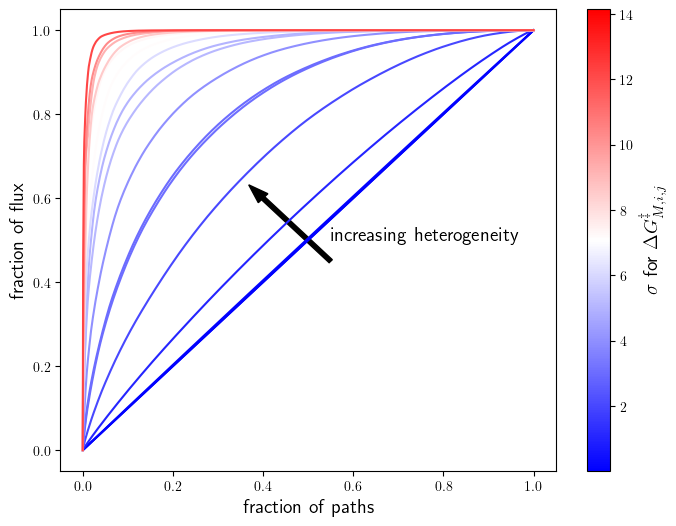

In [64]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

models = np.sort([a for a in df['model'].value_counts().index])
cmap = mpl.colormaps['bwr']

for i,m in enumerate(tqdm(models[::20])):
    df2 = df[df['model'] == m].sort_values('permeability percent', ascending=False)
    n_paths = df2.paths.max()
    s = df2['dG sigma'].iloc[0]
    s_norm = df2['dG normalized'].iloc[0]

    df2['flux fraction'] = df2['permeability percent'].cumsum() / 100
    df2['pore fraction'] = np.arange(1,n_paths+1) / n_paths
    df2.loc[len(df2.index)] = [0,0,0,0,0,m,s,0,0,0] # add zero row for ROC curve

    sns.lineplot(data=df2, x='pore fraction', y='flux fraction', ax=ax, color=cmap(s_norm))
    
ax.arrow(0.55, 0.45, -0.15, 0.15, width=0.01, facecolor='black')
ax.text(0.55, 0.5, 'increasing heterogeneity', ha='left', fontsize=14)


norm = mcolors.Normalize()
cb = fig.colorbar(plt.cm.ScalarMappable(norm=mcolors.Normalize(dG_min,dG_max), cmap=cmap), ax=ax)
cb.set_label(label='$\sigma$ for $\Delta G_{M,i,j}^{\ddag}$', fontsize=14)
ax.set_xlabel('fraction of paths', fontsize=14)
ax.set_ylabel('fraction of flux', fontsize=14)
fig.savefig('figs/flux_fraction_ROC_dG_sigma.png')